In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('lena.jpg')
#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

##  不同空间分辨率

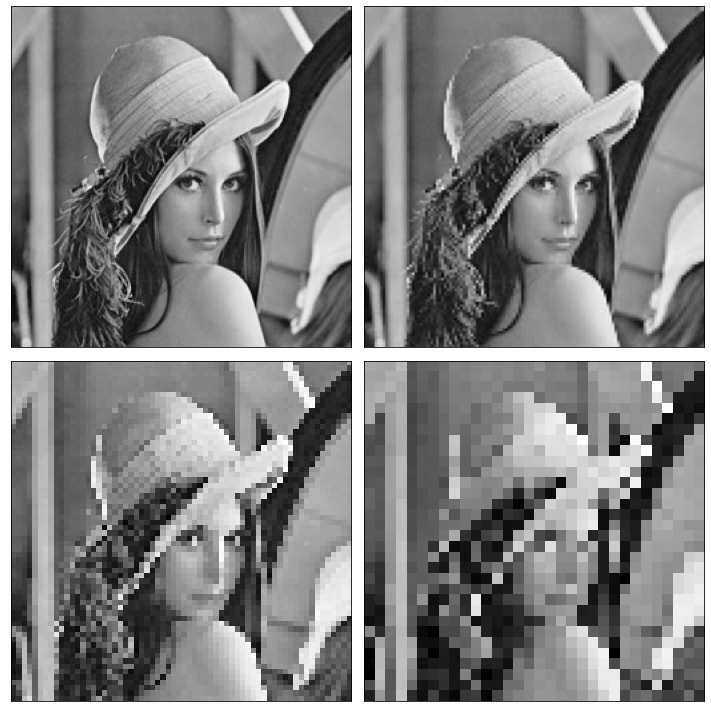

In [5]:
def down_sample(grayImage):
    height = grayImage.shape[0]
    width = grayImage.shape[1]
    dst = np.zeros([height//2, width//2])
    dst = grayImage[::2, ::2]
    return dst

img_2 = down_sample(grayImage)
img_5 = down_sample(img_2)
img_7 = down_sample(img_5)

plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(222), plt.imshow(img_2, 'gray'), plt.axis('off')
plt.subplot(223), plt.imshow(img_5, 'gray'), plt.axis('off')
plt.subplot(224), plt.imshow(img_7, 'gray'), plt.axis('off')
plt.tight_layout()
plt.show()

## 不同灰度分辨率

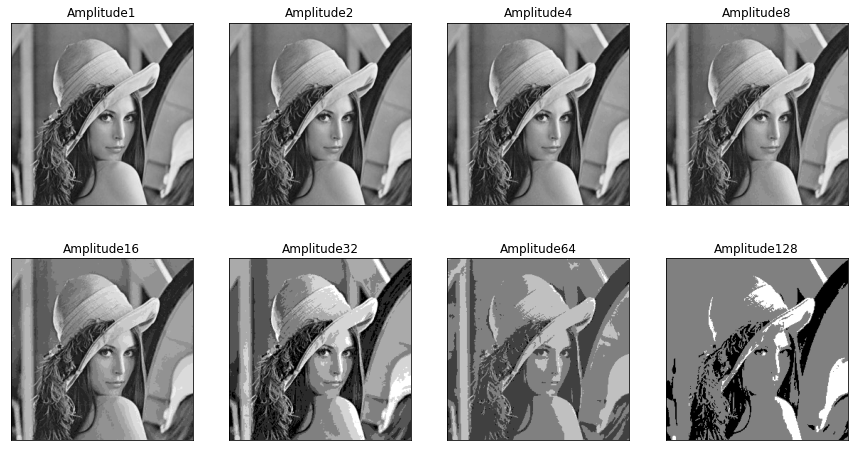

In [16]:

#m, n ,c = timg_1024.shape
import math
img_list = []
img_new = np.ndarray((1024,1024,3),dtype=int)   
img_list_name = []  
index = [int(math.pow(2,i)) for i in range(8)]  

for i in index:
    img_new = np.int64(i * np.round(grayImage/i))
    img_new[img_new > 255] = 255  # 出界限制
    img_list.append(img_new)     
    img_list_name.append("Amplitude"+str(i))
    
row = 2
col = 4

_, axs = plt.subplots(row, col, figsize=(15,15))
plt.subplots_adjust(top=0.4,bottom=0)

for i in range(row):
    for j in range(col):
        axs[i][j].set_title(img_list_name[i*4+j])
        axs[i][j].imshow(img_list[i*4+j],'gray')
        axs[i][j].axes.get_xaxis().set_visible(False)
        axs[i][j].axes.get_yaxis().set_visible(False)
# Amplitude1~128分别对应图像灰度级256~2
plt.show()